# Retrieve Tate-Bryan angles form three orthogonal vectors (X, Y, Z) describing the attitude of a body relative to a fixed reference system described by the three unit vectors (x,y,z)
O. Kaufmann, K Tsakirmpaloglou, 2022.
see https://en.wikipedia.org/wiki/Euler_angles

In [1]:
import numpy as np
from geometron.geometries import vectors as ggv
from geometron.geometries import transforms as ggt
from geometron.plot import plot_3d_vectors, plot_2d_vectors

## Define the unit vecors of the reference system

In [2]:
x = np.array([1.,0.,0.])
y = np.array([0.,1.,0.])
z = np.array([0.,0.,1.])

## Start with the reference system associated to the body aligned on the fixed reference system

In [3]:
X = 2*x
Y = 2*y
Z = 2*z

## Rotate the body along its axes

In [4]:
roll = 20.
pitch = 90.
yaw = -130.

In [5]:
rx = ggt.rotate_around_vector(X, roll, degrees=True)
X = rx@X
Y = rx@Y
Z = rx@Z
ry = ggt.rotate_around_vector(Y, pitch, degrees=True)
X = ry@X
Y = ry@Y
Z = ry@Z
rz = ggt.rotate_around_vector(Z, yaw, degrees=True)
X = rz@X
Y = rz@Y
Z = rz@Z

### Display resulting components of the three vectors

In [6]:
X, Y, Z

(array([-1.09243052e-16, -1.87938524e+00,  6.84040287e-01]),
 array([ 5.64896473e-17, -6.84040287e-01, -1.87938524e+00]),
 array([ 2.00000000e+00, -8.98619447e-17,  1.68610676e-16]))

## Display the body axes (X: red, Y: green, Z: blue) and the fixed reference system (x: cyan, y: yellow, z: magenta) 

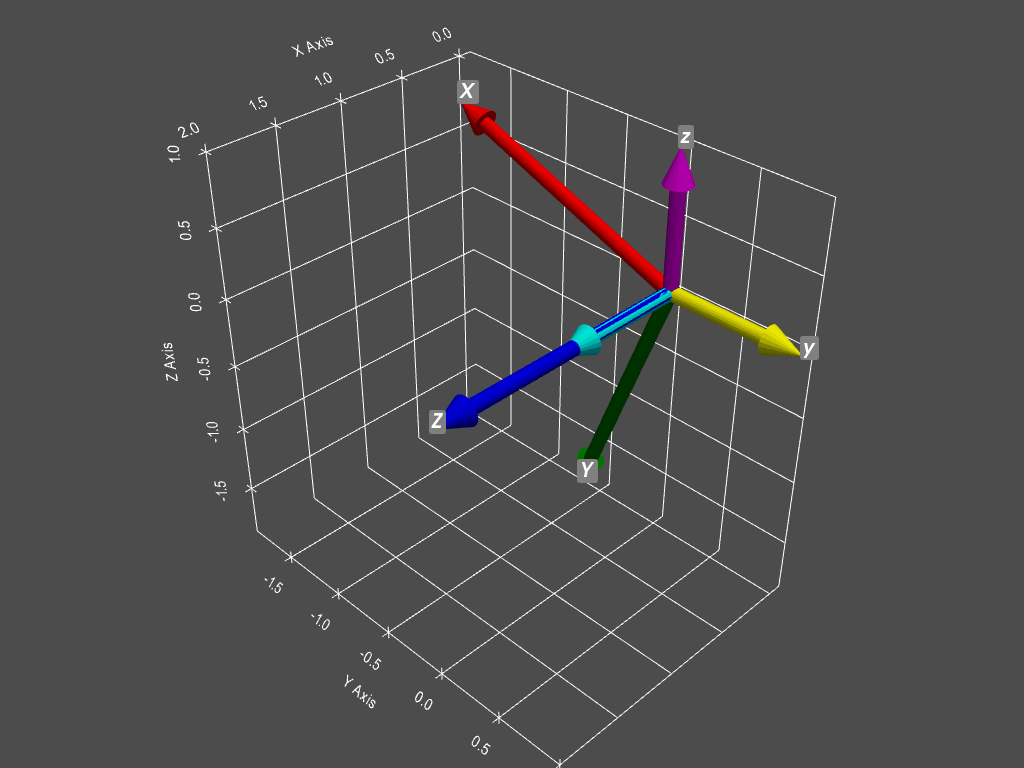

In [7]:
pl = plot_3d_vectors(np.vstack([X, Y, Z, x, y, z]), colors=['red', 'green', 'blue', 'cyan', 'yellow', 'magenta'], names=['X', 'Y', 'Z', 'x', 'y', 'z'],
                     add_labels=True, show_grid=True)
pl.show(jupyter_backend='ipyvtk')

## Compute the Tate-Bryan angles (X1Y2Z3) of the body
Special handeling would be needed in case of 90° rotation around Y
see https://stackoverflow.com/questions/15022630/how-to-calculate-the-angle-from-rotation-matrix

In [8]:
phi = np.rad2deg(np.arctan2(-Z[1], Z[2]))

In [9]:
theta = np.rad2deg(np.arctan2(Z[0], np.sqrt(Z[1]**2+Z[2]**2)))

In [10]:
psi = np.rad2deg(np.arctan2(-Y[0], X[0]))

In [11]:
theta = np.rad2deg(np.arctan2(Z[0], np.sqrt(Z[1]**2+Z[2]**2)))
if np.allclose(theta, 90.):
    phi = 180.
    psi = np.rad2deg(np.arctan2(-X[1], Y[2]))
else: 
    phi = np.rad2deg(np.arctan2(-Z[1], Z[2]))
    psi = np.rad2deg(np.arctan2(-Y[0], X[0]))

### Display the Euler angles

In [12]:
phi, theta, psi

(180.0, 90.0, 135.0)

In [13]:
np.allclose(phi, roll), np.allclose(theta, pitch), np.allclose(psi, yaw) 

(False, True, False)